## Exploratory Data Analysis (EDA) for Consumer Finance Company

### Introduction

In this assignment, we will conduct Exploratory Data Analysis (EDA) on a dataset from a consumer finance company specializing in lending various types of loans to urban customers. The dataset contains information about past loan applicants, their attributes, and whether they defaulted on their loans. The objective is to understand the factors influencing loan default and to identify patterns that can help in minimizing credit risk.

#### Business Understanding

The company faces two primary risks when evaluating loan applications:
- **Risk of Default**: If the applicant is likely to default, approving the loan could lead to financial loss.
- **Loss of Business**: If a potentially creditworthy applicant is denied a loan, it results in a loss of business opportunity.

#### Objectives

The primary objective of this analysis is to:
- Identify key consumer and loan attributes that strongly correlate with loan default.
- Provide insights to help the company make informed decisions, such as adjusting loan approval criteria, setting interest rates, or minimizing credit loss.

#### Dataset Description

The dataset includes the following attributes:
- **Loan Attributes**: Loan amount, term, interest rate, installment, grade, etc.
- **Consumer Attributes**: Employment title, length, home ownership, annual income, etc.
- **Loan Status**: Whether the loan was fully paid, current, or charged off (defaulted).

#### Methodology

We will follow these steps to conduct EDA:
1. **Data Loading and Understanding**: Load the dataset into Jupyter Notebook and understand its structure.
2. **Data Cleaning**: Handle missing values, format data types, and remove duplicates if any.
3. **Initial Exploration**: Explore basic statistics and visualize data distributions.
4. **Univariate Analysis**: Analyze individual variables to understand their distributions, outliers, and general patterns.
5. **Segmented Univariate Analysis**: Further analyze variables by loan status (fully paid vs. charged off) to identify differences.
6. **Bivariate and Multivariate Analysis**: Explore relationships between variables, focusing on correlations and dependencies.
7. **Insights and Recommendations**: Summarize findings and propose actionable insights based on the analysis.

By leveraging EDA techniques, we aim to provide actionable insights that will support the company's risk assessment and lending decisions.

Let's begin our exploration of the dataset to uncover meaningful insights into loan default prediction.
nsights into loan default prediction.
of the dataset to uncover meaningful insights into loan default prediction.
o uncover valuable insights!


<br><br>

### Data Loading and Understanding

We will begin by loading the dataset (`loan.csv`) into our Jupyter Notebook environment and gaining an initial understanding of its structure and contents.

#### Dataset Description

The dataset (`loan.csv`) contains information about past loan applicants, their attributes, and loan status. Here are some key details about the dataset:

- **Loan Attributes**: Includes loan amount, term, interest rate, installment, grade, etc.
- **Consumer Attributes**: Includes employment title, length of employment, home ownership status, annual income, etc.
- **Loan Status**: Indicates whether the loan was fully paid, current, or charged off (defaulted).

### Objective

Our objective in this step is to load the dataset, understand its structure, and check for any initial issues such as missing values or incorrect data types.



In [259]:
import warnings
# Suppress FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [261]:
# Load the dataset
df = pd.read_csv('loan.csv', low_memory=False)

In [263]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [265]:
# Display the summary information of the dataset
print("\nDataset summary information:")
print(df.info())


Dataset summary information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [267]:
# Display basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
df.describe()


Basic statistics of numerical columns:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [269]:
# List all columns
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)



<br><br>
## Data Cleaning

Data cleaning is an essential step to ensure the dataset is ready for analysis. In this section, we perform various tasks to clean the dataset and prepare it for Exploratory Data Analysis (EDA).



### Remove columns that are not important

In [273]:
# Drop unnecessary columns: identifiers and description
df = df.drop(columns=['id', 'member_id', 'url', 'desc'])

# Drop unnecessary columns: loan details and status
df = df.drop(columns=['pymnt_plan', 'title', 'initial_list_status'])

# Drop unnecessary columns: post-origination variables
df = df.drop(columns=['out_prncp', 'out_prncp_inv'])

# Drop unnecessary columns: post-loan and status indicators
df = df.drop(columns=['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                      'collection_recovery_fee', 'last_pymnt_d', 
                      'last_pymnt_amnt', 'last_credit_pull_d'])

# Drop unnecessary columns: low variability or post-loan status
df = df.drop(columns=['collections_12_mths_ex_med', 'policy_code', 'application_type', 
                      'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 
                      'pub_rec_bankruptcies', 'tax_liens'])

# Display the first few rows of the cleaned dataset
print(df.shape)


(39717, 84)


### Handling Missing Values

In [276]:
def display_missing_values(df):
    
    # Check for missing values
    missing_values = df.isnull().sum()
    
    # Sort the missing values in descending order
    missing_values_sorted = missing_values.sort_values(ascending=False)
    
    # Calculate percentage of missing values relative to total entries
    percentage_missing = (missing_values_sorted / len(df)) * 100
    
    # Combine missing values and percentages into a DataFrame for better presentation
    missing_data = pd.concat([missing_values_sorted, percentage_missing], axis=1, keys=['Total Missing', 'Percentage'])
    
    # Print the sorted missing values and percentages
    print("\nMissing values in the dataset (sorted):")
    print(missing_data)
    return percentage_missing

In [278]:
# Use the function to display missing values
percentage_missing = display_missing_values(df)

# Identify columns to drop based on threshold percentage
columns_to_drop = percentage_missing[percentage_missing >= 50].index

# Drop identified columns from DataFrame
df = df.drop(columns=columns_to_drop)

# Print columns that were dropped
if len(columns_to_drop) > 0:
    print(f"\nColumns with 50% or more missing values were dropped:")

# Print the cleaned DataFrame
print("\nDataFrame after dropping columns with 50% or more missing values:")
print(df.shape)

# Use the function to display missing values
display_missing_values(df)


Missing values in the dataset (sorted):
                                Total Missing  Percentage
il_util                                 39717  100.000000
mths_since_recent_revol_delinq          39717  100.000000
mths_since_recent_bc_dlq                39717  100.000000
mths_since_recent_bc                    39717  100.000000
mort_acc                                39717  100.000000
mo_sin_rcnt_tl                          39717  100.000000
mo_sin_rcnt_rev_tl_op                   39717  100.000000
mo_sin_old_rev_tl_op                    39717  100.000000
mo_sin_old_il_acct                      39717  100.000000
bc_util                                 39717  100.000000
bc_open_to_buy                          39717  100.000000
avg_cur_bal                             39717  100.000000
acc_open_past_24mths                    39717  100.000000
inq_last_12m                            39717  100.000000
total_cu_tl                             39717  100.000000
inq_fi                         

emp_title              6.191303
emp_length             2.706650
revol_util             0.125891
loan_amnt              0.000000
purpose                0.000000
revol_bal              0.000000
pub_rec                0.000000
open_acc               0.000000
inq_last_6mths         0.000000
earliest_cr_line       0.000000
delinq_2yrs            0.000000
dti                    0.000000
addr_state             0.000000
zip_code               0.000000
issue_d                0.000000
loan_status            0.000000
funded_amnt            0.000000
verification_status    0.000000
annual_inc             0.000000
home_ownership         0.000000
sub_grade              0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
total_acc              0.000000
dtype: float64

<br><br>
#### Handling emp_title missing values

In [281]:
# Check missing values in emp_title
missing_emp_title = df['emp_title'].isnull().sum()
print(f"Missing values in emp_title: {missing_emp_title}")

# Explore data distribution of non-missing values
print("\nValues in emp_title:")
print(df['emp_title'].value_counts())

Missing values in emp_title: 2459

Values in emp_title:
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64


##### emp_title

- **Missing Values**: 2,459 (6.19% of total records)
- **Imputation Strategy**: Missing values in `emp_title` are replaced with 'Unknown' to indicate that the specific employment title is not available.

By replacing missing values with 'Unknown', we maintain the integrity of the dataset while acknowledging the absence of reported employment titles for these records. This approach ensures consistency in data analysis and preserves the distribution of known employment titles in the dataset.


In [284]:
# Replace missing values in emp_title with 'Unknown'
df['emp_title'].fillna('Unknown', inplace=True)

# Explore data distribution of non-missing values
print("\nTop 5 values in emp_title:")
print(df['emp_title'].value_counts().head())


Top 5 values in emp_title:
emp_title
Unknown            2459
US Army             134
Bank of America     109
IBM                  66
AT&T                 59
Name: count, dtype: int64


In [286]:
# Calculate total missing values and their percentage
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({'Total Missing': missing_data, 'Percentage': missing_percentage})

# Filter columns with missing values
missing_df = missing_df[missing_df['Total Missing'] > 0]

print("Columns with missing values:")
print(missing_df)

Columns with missing values:
            Total Missing  Percentage
emp_length           1075        2.71
revol_util             50        0.13


<br><br>
#### Handling emp_length missing values

In [289]:
# Check missing values in emp_length
missing_emp_length = df['emp_length'].isnull().sum()
print(f"Missing values in emp_length: {missing_emp_length}")

# Explore data distribution of non-missing values
print("\nTop 5 frequent values in emp_length:")
print(df['emp_length'].value_counts())

Missing values in emp_length: 1075

Top 5 frequent values in emp_length:
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [291]:
# Calculate the mode of emp_length
mode_emp_length = df['emp_length'].mode()[0]  
print(mode_emp_length)  


10+ years


##### emp_length

- **Missing Values**: 1,075 (2.71% of total records)
- **Imputation Strategy**: Mode imputation chosen because it represents the most frequent length of employment reported across the dataset. 

The mode, "10+ years", appears 8,879 times, making it the most prevalent employment length. This choice ensures that the imputed values align closely with the overall distribution of employment lengths, minimizing potential bias in subsequent analyses.

In [294]:
# Replace missing values in emp_length with the mode ('10+ years')
mode_emp_length = df['emp_length'].mode()[0]
df['emp_length'].fillna(mode_emp_length, inplace=True)

# Value after imputation
print("\nTop 5 values in emp_length after imputation:")
print(df['emp_length'].value_counts().head())



Top 5 values in emp_length after imputation:
emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
Name: count, dtype: int64


<br><br>
#### Handling revol_util missing values

In [297]:
# Check summary statistics of revol_util
print(df['revol_util'].describe())

# Check missing values in revol_util
missing_revol_util = df['revol_util'].isnull().sum()
print(f"\nMissing values in revol_util: {missing_revol_util}")

# Explore data distribution of non-missing values
print("\nTop 5 frequent values in revol_util:")
print(df['revol_util'].value_counts())

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

Missing values in revol_util: 50

Top 5 frequent values in revol_util:
revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64


<br><br>
##### Imputation Choice: Median for `revol_util`

Median imputation is selected due to the variable's wide range of unique values (1089) and its continuous nature. With 50 missing values, median imputation ensures robustness by filling in missing data with a representative value that minimally impacts the variable's distribution and statistical properties.


In [300]:
# Remove '%' sign and convert to numeric
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float64')

# Calculate the median of 'revol_util'
median_revol_util = df['revol_util'].median()

# Impute missing values with the median
df['revol_util'].fillna(median_revol_util, inplace=True)

print("Missing values after imputation:")
print(df['revol_util'].isnull().sum())

Missing values after imputation:
0


In [302]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
dtype: int64


In [304]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Unknown,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Unknown,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38


In [306]:
# Verify the data types
print(df.dtypes)

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util             float64
total_acc                int64
dtype: object


<br><br>
### Data Type Conversion for Loan Dataset

In [309]:
# Convert 'term' to numeric by extracting the numeric part
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

# Remove '%' sign from 'int_rate' and convert to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

# Convert 'issue_d' to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Convert 'emp_length' to numeric by extracting the numeric part
def convert_emp_length(text):
    if pd.isnull(text):
        return text
    elif '< 1 year' in text:
        return 0.5
    elif '10+ years' in text:
        return 10
    else:
        return int(text.split()[0])

df['emp_length'] = df['emp_length'].apply(convert_emp_length)

# Convert 'earliest_cr_line' to datetime format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

# Convert 'zip_code' to categorical or drop it if not needed
# Example of converting to categorical:
df['zip_code'] = df['zip_code'].astype('category')

# Convert other categorical columns to categorical type
cat_cols = ['emp_title', 'grade', 'sub_grade', 'verification_status',
            'loan_status', 'purpose', 'home_ownership', 'addr_state']
df[cat_cols] = df[cat_cols].astype('category')

# Display the updated data types
print(df.dtypes)


loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                        category
sub_grade                    category
emp_title                    category
emp_length                    float64
home_ownership               category
annual_inc                    float64
verification_status          category
issue_d                datetime64[ns]
loan_status                  category
purpose                      category
zip_code                     category
addr_state                   category
dti                           float64
delinq_2yrs                     int64
earliest_cr_line       datetime64[ns]
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc   

In [311]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38


<br><br>
### Handling Outliers

<br><br>
#### Loan Amount

In [315]:
#  loan_amnt
df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

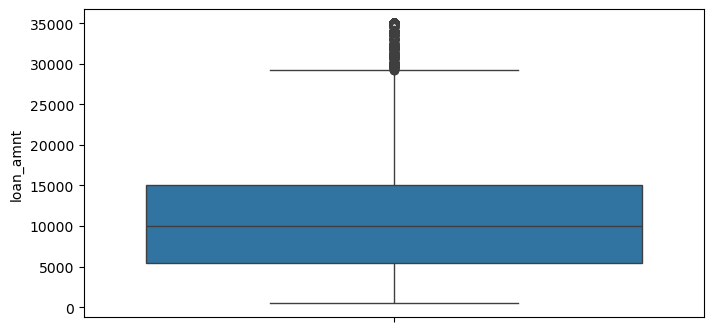

In [317]:
# Chart representation
plt.figure(figsize=[8,4])
sns.boxplot(df.loan_amnt)
plt.show()

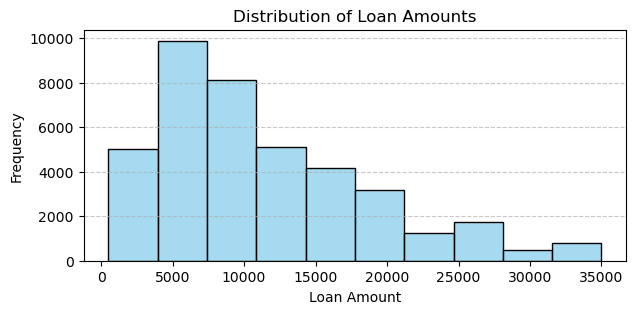

In [319]:
# Plotting the histogram
plt.figure(figsize=(7, 3))
sns.histplot(df.loan_amnt, bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [321]:
# Calculate quartiles (Q1, Q3) and IQR
Q1 = np.percentile(df.loan_amnt, 25)
Q3 = np.percentile(df.loan_amnt, 75)
IQR = Q3 - Q1

# Calculate whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Lower whisker: -8750.0
Upper whisker: 29250.0


##### We can see that loan amounts more than 29250 are outliers. However, we will retain these data points because loan amounts can naturally vary widely depending on the borrower's needs and financial circumstances.
##### Therefore, we will categorize these loan amounts into ranges and create a new column loan_amnt_cat.


In [324]:
# create loan_amnt_cat column
df['loan_amnt_type'] = pd.cut(df.loan_amnt, [500,5500,15000,25000, 35000], labels=['Low','Moderate','High','Very High'])

# Show modified data
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low


<br><br>
#### Annual Income

In [327]:
# annual_inc
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

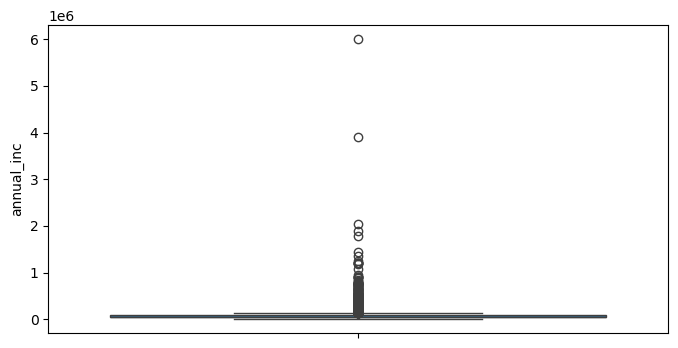

In [329]:
# Chart representation
plt.figure(figsize=[8,4])
sns.boxplot(df.annual_inc)
plt.show()

In [331]:
# max value 
df.annual_inc.max()

6000000.0

In [333]:
# min value
df.annual_inc.min()

4000.0

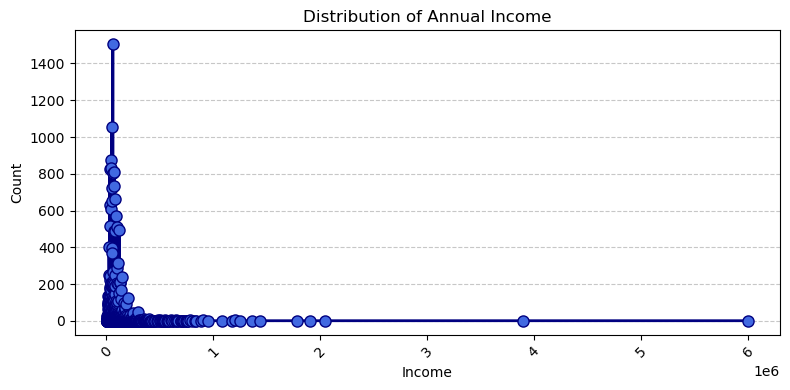

In [335]:
# Plotting the histogram
income_counts = df['annual_inc'].value_counts()

# Sort the index to ensure the order in the plot
income_counts = income_counts.sort_index()
plt.figure(figsize=(8, 4))
income_counts.plot(kind='line', marker='o', color='navy',  markerfacecolor='royalblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Distribution of Annual Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [337]:
# Calculate quartiles (Q1, Q3) and IQR
Q1 = np.percentile(df.annual_inc, 25)
Q3 = np.percentile(df.annual_inc, 75)
IQR = Q3 - Q1

# Calculate whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Lower whisker: -22440.0
Upper whisker: 145144.0


##### We can see that income more than 145144 are outliers. However, we will retain these data points because income can be very high for some borrowers.
##### Therefore, we will categorize these income into ranges and create a new column lannual_inc_cat.

In [340]:
# Create annual_inc_cat column
df['annual_inc_type'] = pd.cut(df['annual_inc'], bins=[4000, 40000, 60000, 85000, 150000, 6000000], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Display the first few rows to verify
print(df[['annual_inc', 'annual_inc_type']].head())

   annual_inc annual_inc_type
0     24000.0        Very Low
1     30000.0        Very Low
2     12252.0        Very Low
3     49200.0             Low
4     80000.0        Moderate


In [342]:
# Show te data
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type,annual_inc_type
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low,Very Low
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low,Very Low
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low,Very Low
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate,Low
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low,Moderate


<br><br>
#### Interest Rate

In [345]:
# int_rate
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

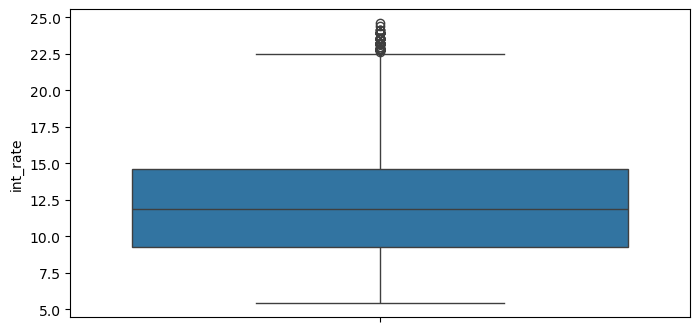

In [347]:
# Chart representation
plt.figure(figsize=[8,4])
sns.boxplot(df.int_rate)
plt.show()

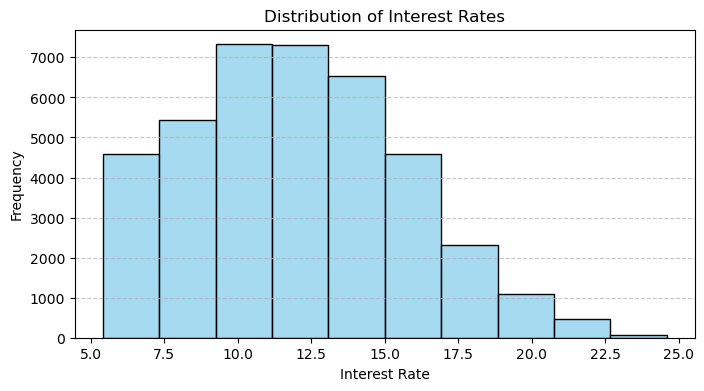

In [349]:
# Plotting the histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['int_rate'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [351]:
# Calculate quartiles (Q1, Q3) and IQR
Q1 = np.percentile(df.int_rate, 25)
Q3 = np.percentile(df.int_rate, 75)
IQR = Q3 - Q1

# Calculate whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Lower whisker: 1.2400000000000002
Upper whisker: 22.6


##### We can see that the upper whisker extends to 22.6, while the maximum value is 24.59, which is not significantly higher. Therefore, we do not need to modify this.

<br><br>
#### Debt-to-income ratio

In [355]:
# dti
df.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

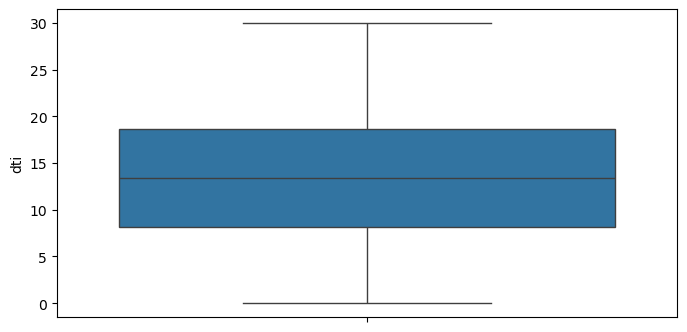

In [357]:
# Chart representation
plt.figure(figsize=[8,4])
sns.boxplot(df.dti)
plt.show()

##### There is no outliers.

<br><br>
### Feature engineering

In [361]:
# Add dti_categry column 

bins = [0, 10, 20, 30, 40]
labels = ['0-10', '10-20', '20-30', '30-40']

# Create the dti_category column
df['dti_category'] = pd.cut(df['dti'], bins=bins, labels=labels, right=False)

print(df[['dti', 'dti_category']].head())


     dti dti_category
0  27.65        20-30
1   1.00         0-10
2   8.72         0-10
3  20.00        20-30
4  17.94        10-20


In [363]:
# Extract month and year from issue_d
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year


# Display the updated dataframe
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type,annual_inc_type,dti_category,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low,Very Low,20-30,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low,Very Low,0-10,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low,Very Low,0-10,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate,Low,20-30,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low,Moderate,10-20,12,2011


In [365]:

# Calculate length of credit history by subtracting 'earliest_cr_line' from current date
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%d-%m-%Y')
df['credit_history_length'] = (pd.to_datetime('now') - df['earliest_cr_line']).dt.days / 365.25

# Display the updated dataframe
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type,annual_inc_type,dti_category,issue_month,issue_year,credit_history_length
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low,Very Low,20-30,12,2011,39.559206
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low,Very Low,0-10,12,2011,25.314168
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low,Very Low,0-10,12,2011,22.726899
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate,Low,20-30,12,2011,28.476386
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low,Moderate,10-20,12,2011,28.561259


In [367]:
# Encode 'addr_state' into regions (Northeast, Midwest, South, West)
def state_to_region(state):
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    midwest = ['WI', 'MI', 'IL', 'IN', 'OH', 'ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO']
    south = ['DE', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']
    west = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'CO', 'NM', 'AZ', 'UT', 'AK', 'HI']
    
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df['region'] = df['addr_state'].apply(state_to_region)

# Display the updated dataframe
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type,annual_inc_type,dti_category,issue_month,issue_year,credit_history_length,region
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low,Very Low,20-30,12,2011,39.559206,West
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low,Very Low,0-10,12,2011,25.314168,South
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low,Very Low,0-10,12,2011,22.726899,Midwest
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate,Low,20-30,12,2011,28.476386,West
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low,Moderate,10-20,12,2011,28.561259,West


In [369]:
df.shape

(39717, 34)


# Univariate analysis

## loan_amnt_type

In [373]:
# Calculate frequency distribution
loan_amnt_type_counts = df['loan_amnt_type'].value_counts()
print('Frequency distribution of', loan_amnt_type_counts)

# Calculate percentage distribution
loan_amnt_type_percentages = loan_amnt_type_counts / len(df) * 100
print('\nPercentage distribution of',loan_amnt_type_percentages)

Frequency distribution of loan_amnt_type
Moderate     20380
Low          10129
High          7590
Very High     1613
Name: count, dtype: int64

Percentage distribution of loan_amnt_type
Moderate     51.313040
Low          25.502933
High         19.110205
Very High     4.061233
Name: count, dtype: float64


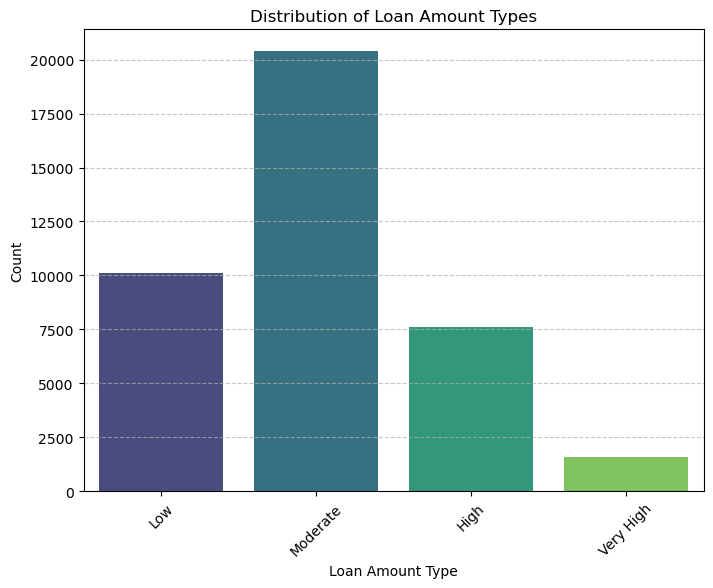

In [375]:
# Bar plot for loan amount types
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_amnt_type_counts.index, y=loan_amnt_type_counts.values, palette='viridis')
plt.title('Distribution of Loan Amount Types')
plt.xlabel('Loan Amount Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [377]:
# Summary statistics by loan amount type
summary_stats = df.groupby('loan_amnt_type')['loan_amnt'].describe()
print(summary_stats)

                  count          mean          std      min      25%      50%  \
loan_amnt_type                                                                  
Low             10129.0   3614.362227  1273.830021    700.0   2500.0   4000.0   
Moderate        20380.0   9972.481600  2871.520878   5525.0   7500.0  10000.0   
High             7590.0  20372.753623  3185.726552  15025.0  18000.0  20000.0   
Very High        1613.0  31693.676379  3211.318938  25200.0  29700.0  31000.0   

                    75%      max  
loan_amnt_type                    
Low              5000.0   5500.0  
Moderate        12000.0  15000.0  
High            24000.0  25000.0  
Very High       35000.0  35000.0  


#### Observation: 
The analysis reveals that loans categorized as "Moderate" have the highest frequency, followed by "Low," "High," and "Very High" categories sequentially. This distribution indicates that borrowers tend to request loans in the moderate range more frequently compared to higher or lower amounts.

## int_rate

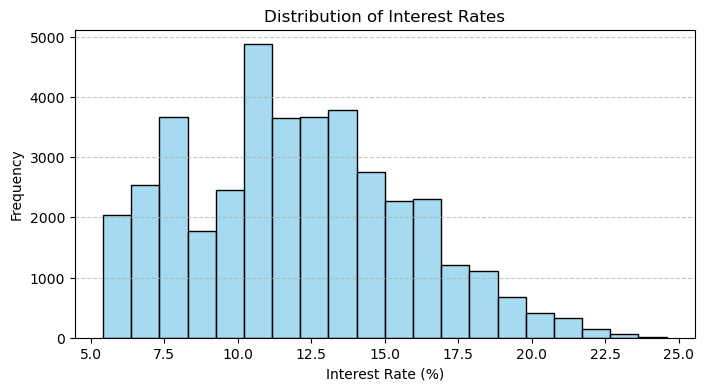

In [381]:
# Plotting the histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['int_rate'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Observation: 
The most common interest rates are between 7.5% and 15%, with a noticeable peak around 10%.
The highest frequency of interest rates is around 10%, with over 5000 instances.
The distribution is right-skewed, indicating that while most interest rates are clustered around the lower end (5% to 15%), there are fewer instances of higher interest rates (above 15%).

## annual_inc

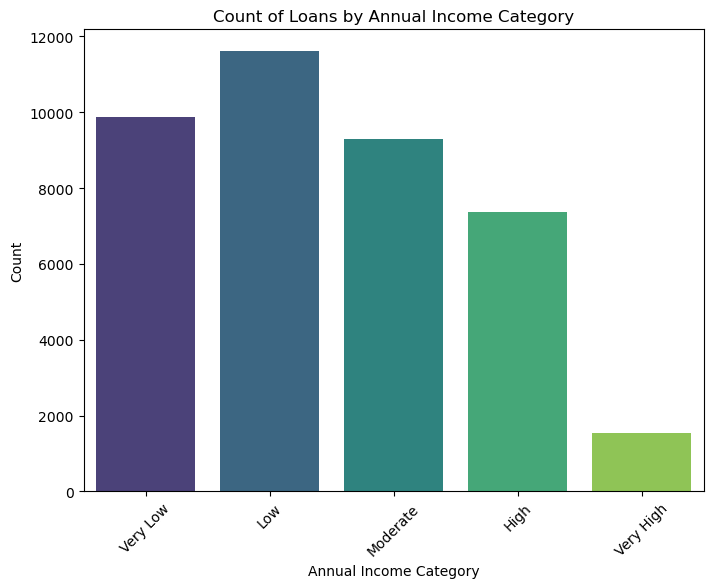

In [385]:
# Plotting the count plot for annual_inc_type
plt.figure(figsize=(8, 6))
sns.countplot(x='annual_inc_type', data=df, palette='viridis')
plt.title('Count of Loans by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

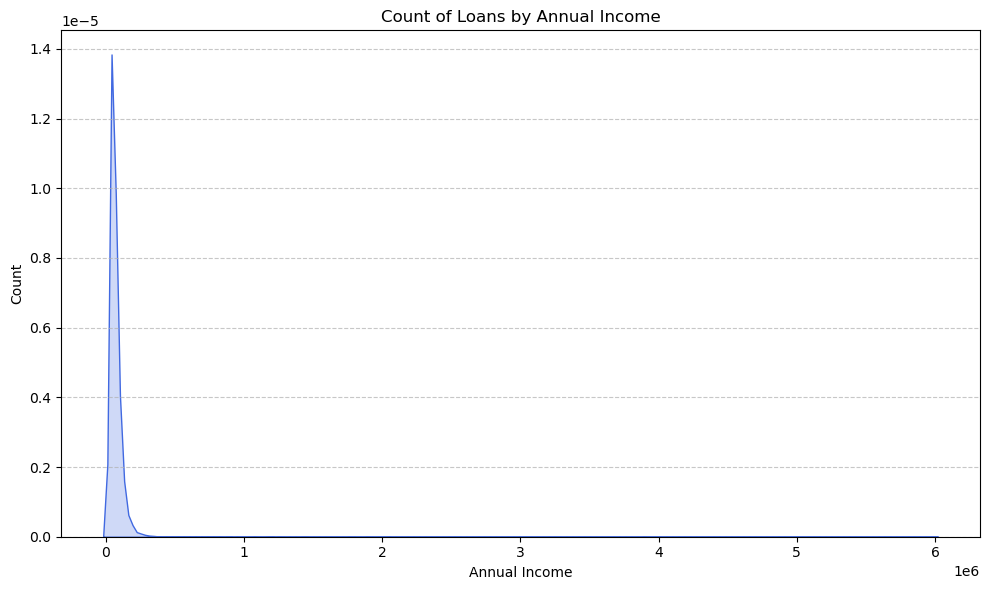

In [387]:
# Plotting the count plot for annual_inc
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['annual_inc'], shade=True, color='royalblue')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Count of Loans by Annual Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observation: 
Highly skewed towards lower incomes with a peak around the lower end.
Significant drop-off in loans as income exceeds 1 million.

Lower income categories (Very Low and Low) dominate loan counts.
Higher income categories see a steep decline in loan numbers.
Few high-income individuals apply for or receive loans.

Conclusion: The data shows a strong concentration of loans among lower-income individuals, with higher-income individuals comprising a very small portion of the loan dataset.

In [390]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_amnt_type,annual_inc_type,dti_category,issue_month,issue_year,credit_history_length,region
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,Low,Very Low,20-30,12,2011,39.559206,West
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,Low,Very Low,0-10,12,2011,25.314168,South
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,Low,Very Low,0-10,12,2011,22.726899,Midwest
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,Moderate,Low,20-30,12,2011,28.476386,West
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,Low,Moderate,10-20,12,2011,28.561259,West


## Debt-to-Income Ratio (DTI)

Text(0, 0.5, 'Frequency')

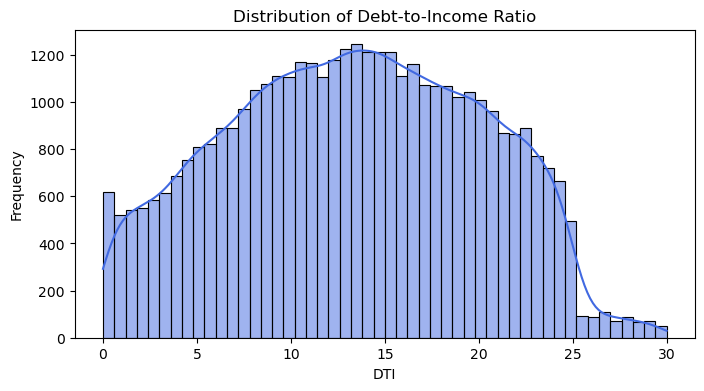

In [393]:
plt.figure(figsize=(8, 4))

# Distribution of Debt-to-Income Ratio
sns.histplot(df['dti'], kde=True, color='royalblue')
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('DTI')
plt.ylabel('Frequency')


### Observations
The distribution of Debt-to-Income Ratio (DTI) is slightly right-skewed.
Most borrowers have a DTI between 10 and 20.
The peak of the distribution is around 15 DTI.
These observations indicate that the majority of borrowers have moderate levels of debt relative to their income, with fewer borrowers having extremely low or extremely high DTIs.

## Grade

In [397]:
# Getting the count of each grade
grade_counts = df['grade'].value_counts()
print(grade_counts)

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64


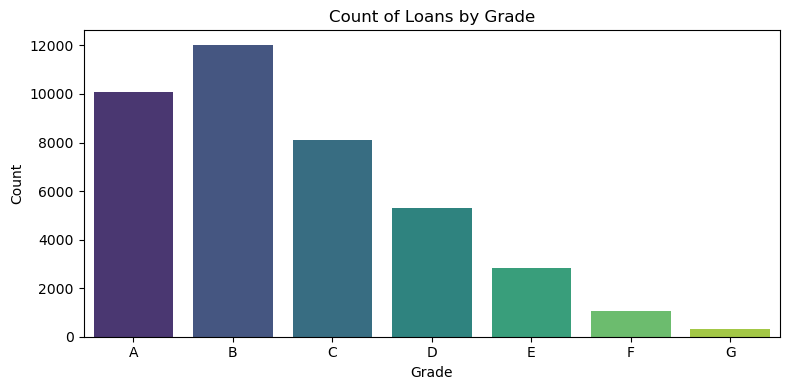

In [399]:
# Plotting the count of loans by Grade
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=df, palette='viridis')
plt.title('Count of Loans by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observations
Most loans are given to people with grades A, B, and C, showing they have good credit. Fewer loans are given to those with grades D, E, F, and G, which means they are riskier borrowers. This helps us understand the risk levels of different borrowers.

## loan_status

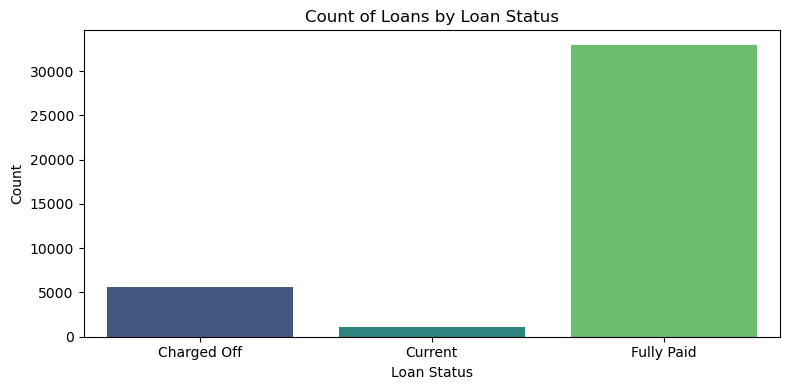

In [403]:
# Plotting the count of loans by Loan Status
plt.figure(figsize=(8, 4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Count of Loans by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observations
Most loans are fully paid, indicating high repayment success. A significant number of defaults (charged off loans) are present, while fewer loans are currently active. This helps in understanding borrower repayment performance.

# segmented univariate analysis

## Loan Status by Grade

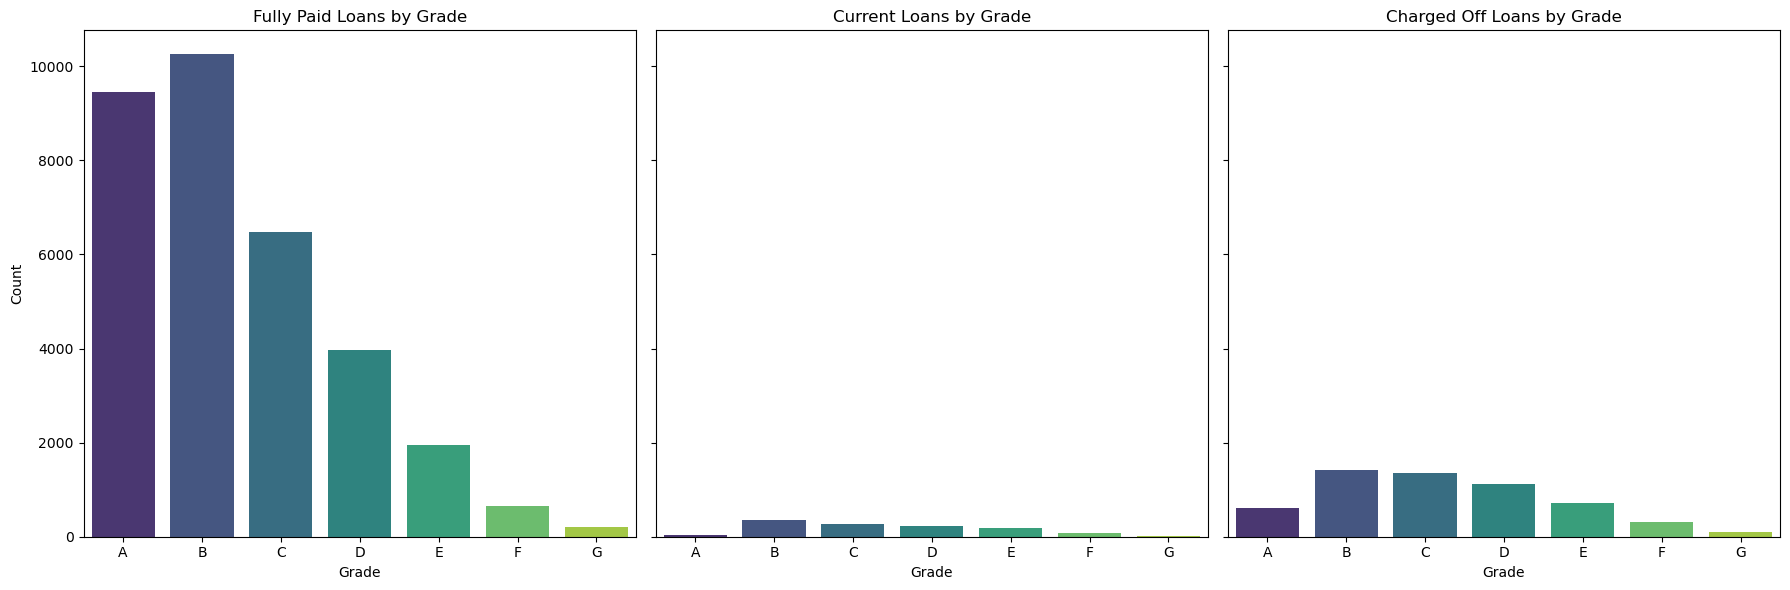

In [408]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Fully Paid loans by Grade
sns.countplot(x='grade', data=df[df['loan_status'] == 'Fully Paid'], palette='viridis', ax=axes[0])
axes[0].set_title('Fully Paid Loans by Grade')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')

# Plot for Current loans by Grade
sns.countplot(x='grade', data=df[df['loan_status'] == 'Current'], palette='viridis', ax=axes[1])
axes[1].set_title('Current Loans by Grade')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')

# Plot for Charged Off loans by Grade
sns.countplot(x='grade', data=df[df['loan_status'] == 'Charged Off'], palette='viridis', ax=axes[2])
axes[2].set_title('Charged Off Loans by Grade')
axes[2].set_xlabel('Grade')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Observations:

**Grades A and B:**
- These grades have a high number of loans that are fully paid and current, indicating good creditworthiness and lower default risk.

**Grades C, D, E:**
- There is a mix of fully paid, charged off (not paid back), and current loans in these grades, suggesting a moderate level of risk.

**Grades F and G:**
- Loans in these grades are fewer in all categories, suggesting higher risk. Lenders issue fewer loans in these grades.

## 
## Loan Status by DTI Category

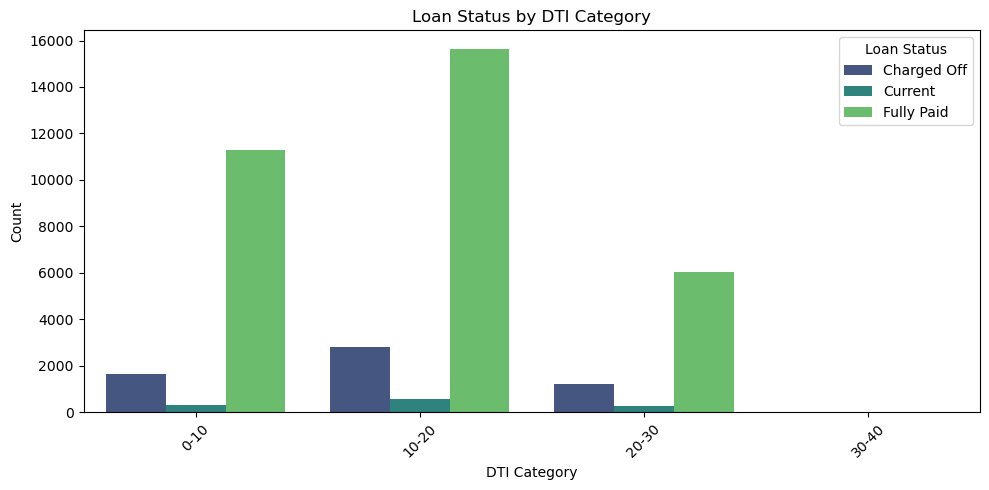

In [412]:
# Plotting the Loan Status by DTI Category
plt.figure(figsize=(10, 5))
sns.countplot(x='dti_category', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

### Observations
When people have lower debt-to-income ratios (0-10%, 10-20%), they tend to default less often. Most of them fully repay their debts. However, as the debt-to-income ratio increases (20-30%, 30-40%), more people default on their loans. This shows that higher debt-to-income ratios are linked to a greater risk of not repaying loans.

##
##  Loan Status by Annual Income Type

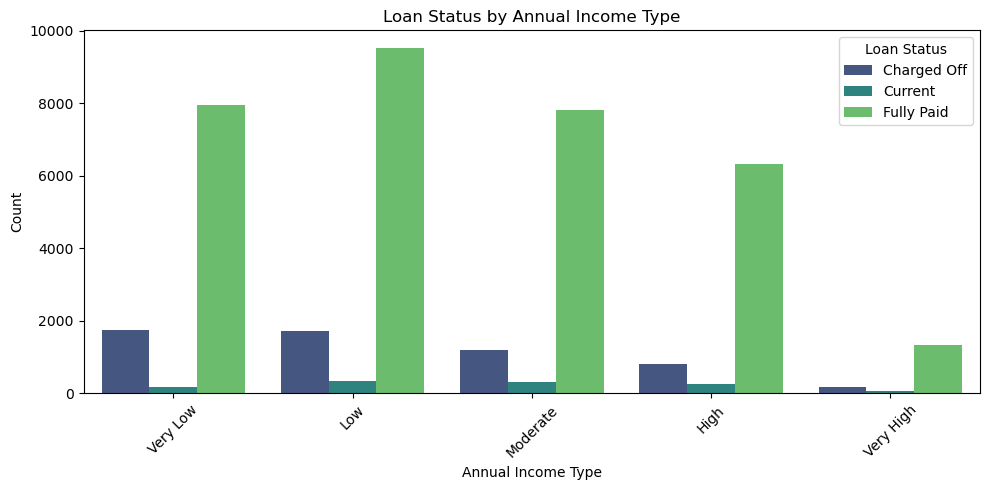

In [416]:
plt.figure(figsize=(10, 5))
sns.countplot(x='annual_inc_type', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Annual Income Type')
plt.xlabel('Annual Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

### Observations
Applicants who have "Very Low" and "Low" annual incomes tend to default on loans more frequently compared to those with "Moderate," "High," and "Very High" incomes. Generally, higher incomes are associated with better rates of repaying loans on time.

##
## Loan Status vs Region

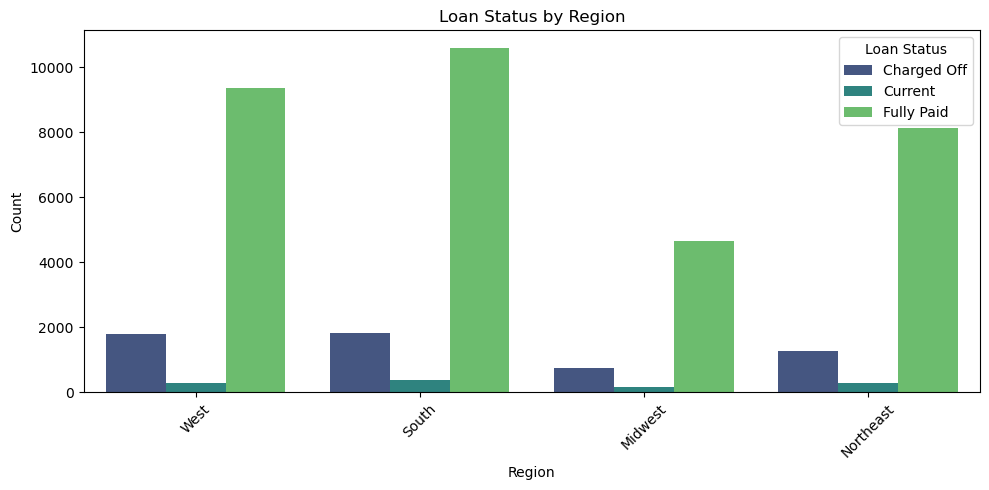

In [420]:
filtered_df = df[df['region'] != 'Other']

plt.figure(figsize=(10, 5))
sns.countplot(x='region', hue='loan_status', data=filtered_df, palette='viridis')
plt.title('Loan Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


### Observations
The analysis shows that loan repayment varies by region. In the West, borrowers have the highest default rate (15.58%) and the lowest rate of fully paid loans (81.89%). This suggests more financial stress, leading to a higher chance of default compared to the Midwest and Northeast. These regions have lower default rates and higher rates of fully paid loans, showing better financial health. To manage risks, financial institutions should account for these regional differences when approving loans or creating specific financial products.

##
## Loan Status by Term

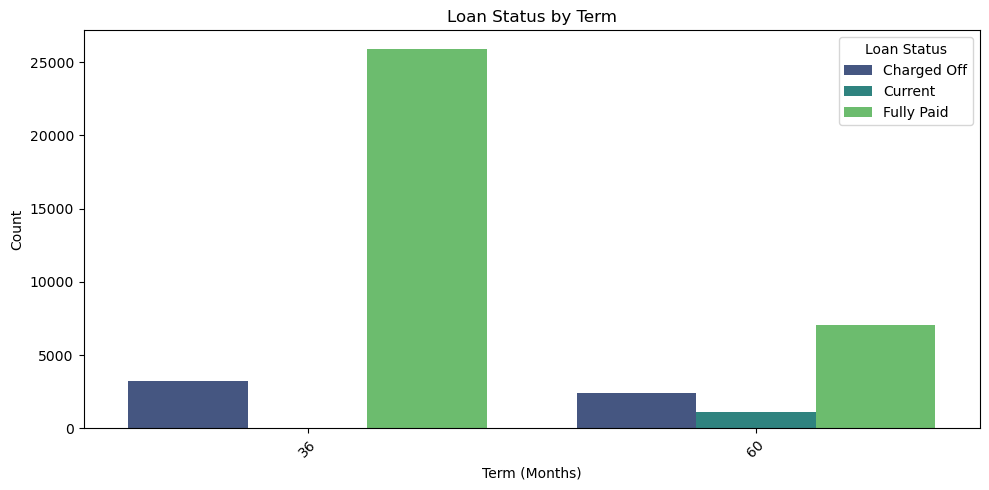

In [424]:
plt.figure(figsize=(10, 5))
sns.countplot(x='term', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Term')
plt.xlabel('Term (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


### Observations
Loans that last for 60 months have much higher default rates compared to 36-month loans. Longer-term loans might carry more risk because they require a longer commitment to repay the money borrowed.

##
## Loan Status by Employment Length

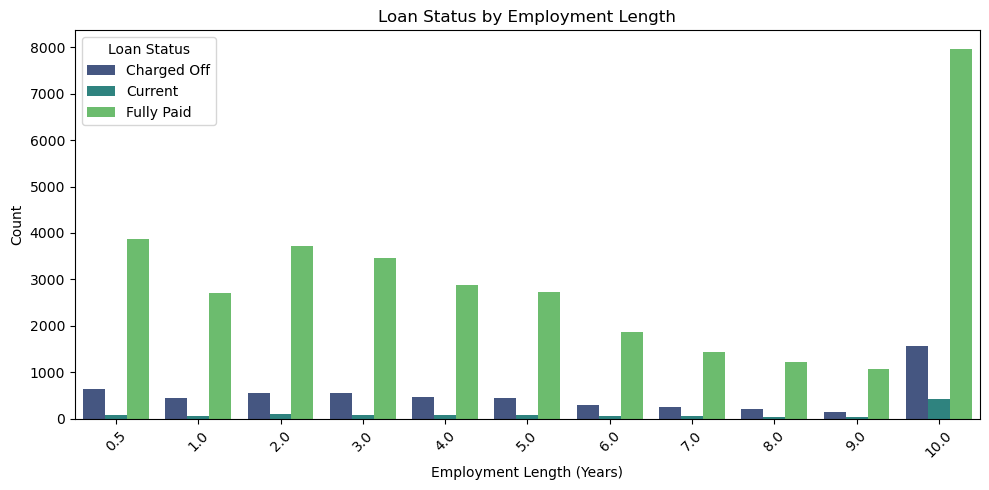

In [428]:
plt.figure(figsize=(10, 5))
sns.countplot(x='emp_length', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


### Observations
There's a noticeable trend where people with very long employment lengths (10+ years) show slightly higher default rates compared to those with shorter employment histories. This could be caused by various aspects.





##
## Loan Status by Purpose

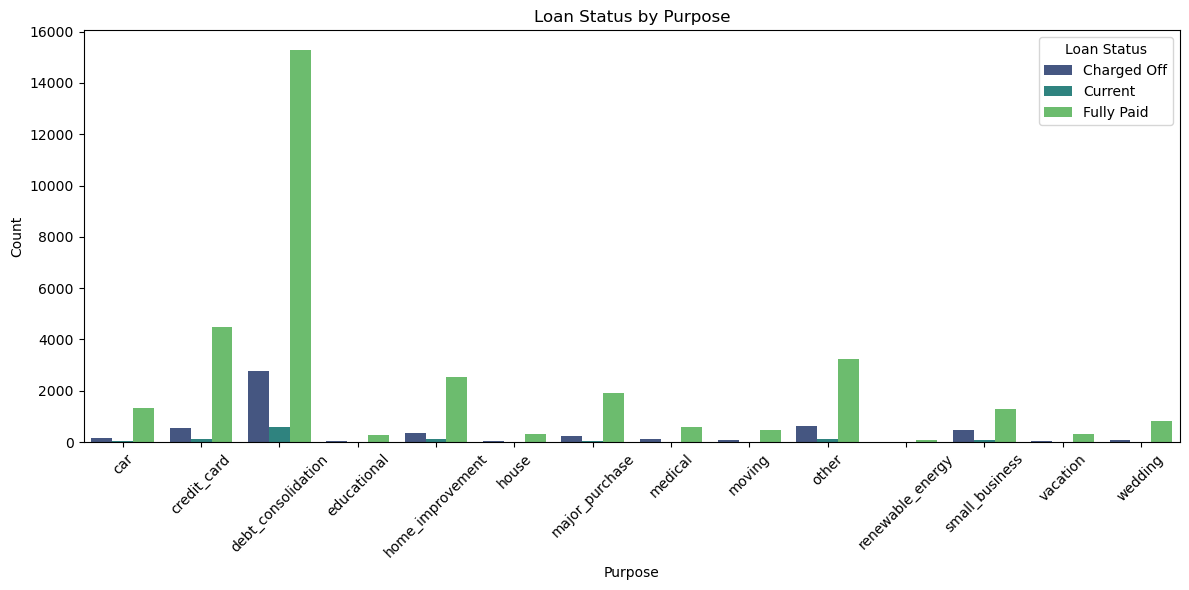

In [432]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


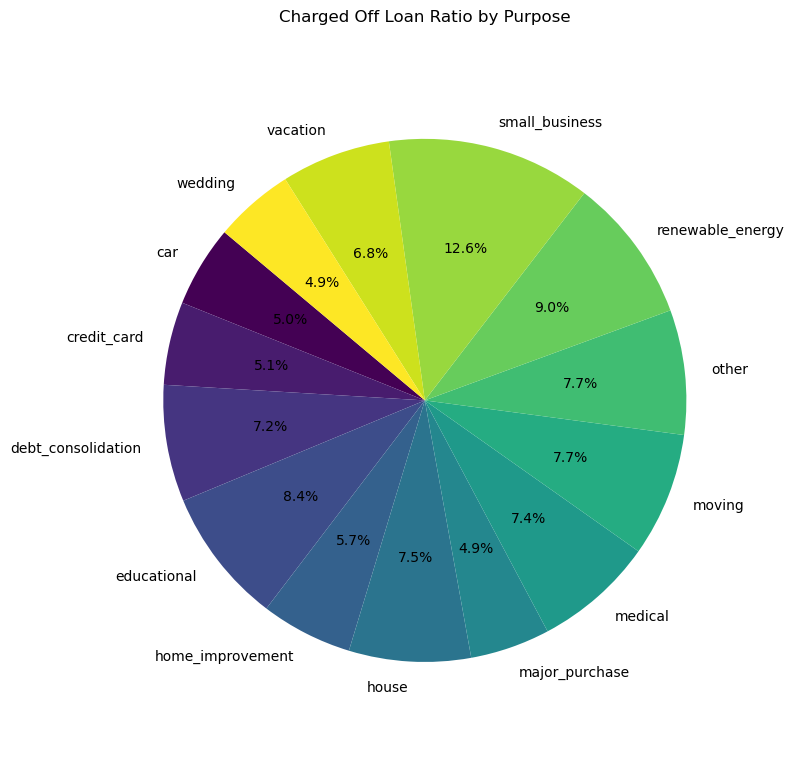

In [434]:
# Filter the DataFrame for charged off loans
charged_off_data = df[df['loan_status'] == 'Charged Off']

charged_off_ratio = charged_off_data.groupby('purpose').size() / df.groupby('purpose').size()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(charged_off_ratio)))
plt.pie(charged_off_ratio, labels=charged_off_ratio.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Charged Off Loan Ratio by Purpose')
plt.axis('equal') 
plt.tight_layout()
plt.show()

### Observations
Loans for small businesses have the highest default rate, followed by educational and renewable energy loans. On the other hand, categories such as car, credit card, and wedding loans show lower default rates. This indicates that loans taken for more optional or dependable purposes generally have better repayment histories.

#
# Bivariate / Multivariate Analysis

## 
## DTI and Annual Income vs. Loan Status

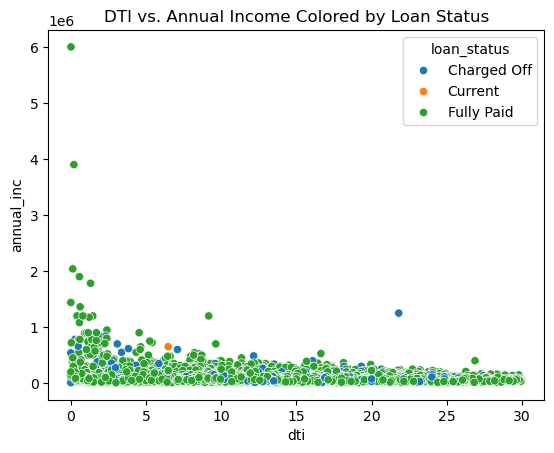

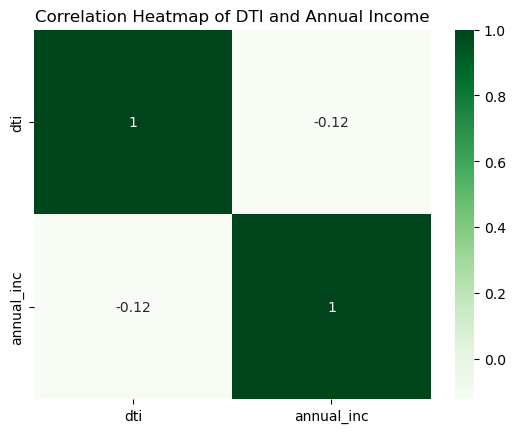

In [439]:
# Scatter plot matrix to visualize relationships
sns.scatterplot(x='dti', y='annual_inc', hue='loan_status', data=df)
plt.title('DTI vs. Annual Income Colored by Loan Status')
plt.show()

# Correlation heatmap
corr_matrix = df[['dti', 'annual_inc']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of DTI and Annual Income')
plt.show()

### Observations

- Most loans go to borrowers with manageable debt relative to their income, indicating good financial management. Income and debt levels vary widely among borrowers. Higher earners generally have lower debt relative to their income (-0.12 correlation).

- Charged-off loans are more common at higher DTI levels, especially beyond typical thresholds, indicating that as DTI rises, borrowers' ability to manage and repay debts decreases, increasing default risk.
  
- Fully Paid loans are mostly held by people who have low debt compared to their income, meaning they manage their money well and are more likely to pay back their loans.



## 
## Loan Amount, Interest Rate, DTI vs. Loan Status

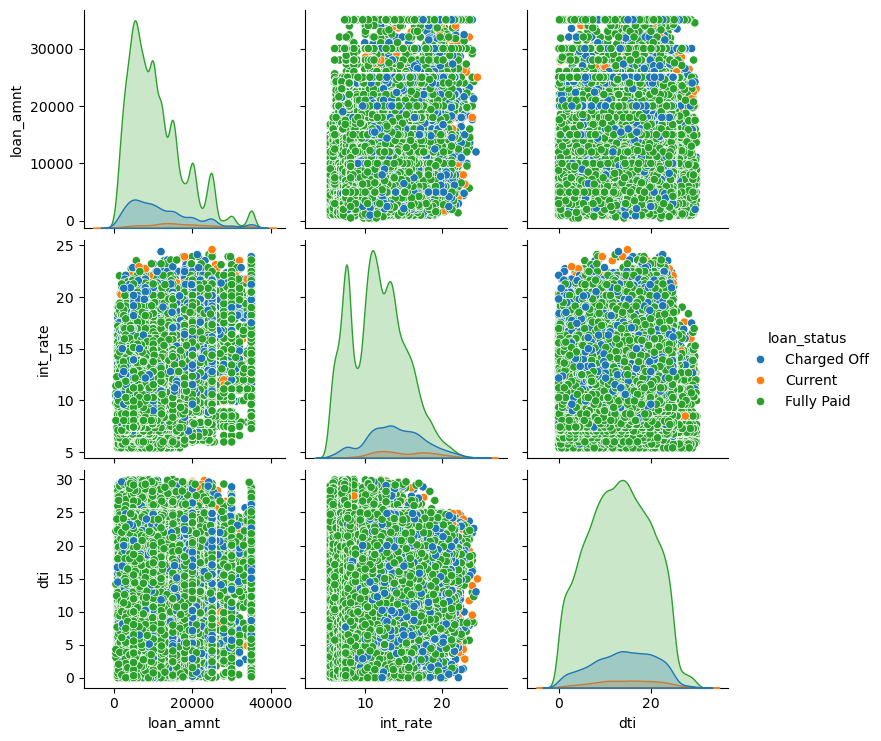

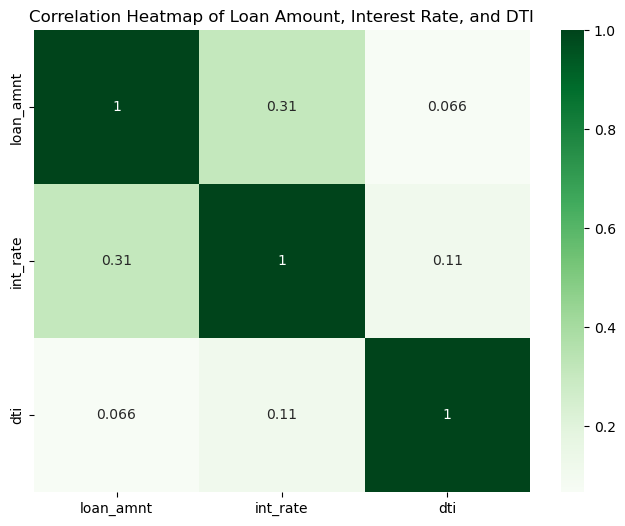

In [443]:
# Scatter plot matrix to visualize relationships
sns.pairplot(df, vars=['loan_amnt', 'int_rate', 'dti'], hue='loan_status')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['loan_amnt', 'int_rate', 'dti']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Loan Amount, Interest Rate, and DTI')
plt.show()

### Observations

- Larger loans correlate moderately with higher interest rates (0.31), likely due to increased risk.

- Loan amount minimally affects DTI (0.066),showing that borrowers have different financial conditions.

- Interest rates are weakly tied to DTI (0.11), indicating other factors like credit score may have more influence on interest rates.

No clear patterns show loan status based on these variables alone, suggesting they are important but not sole predictors of loan outcomes.


##
## Credit History Length, Employment Length, Annual Income vs. Loan Status

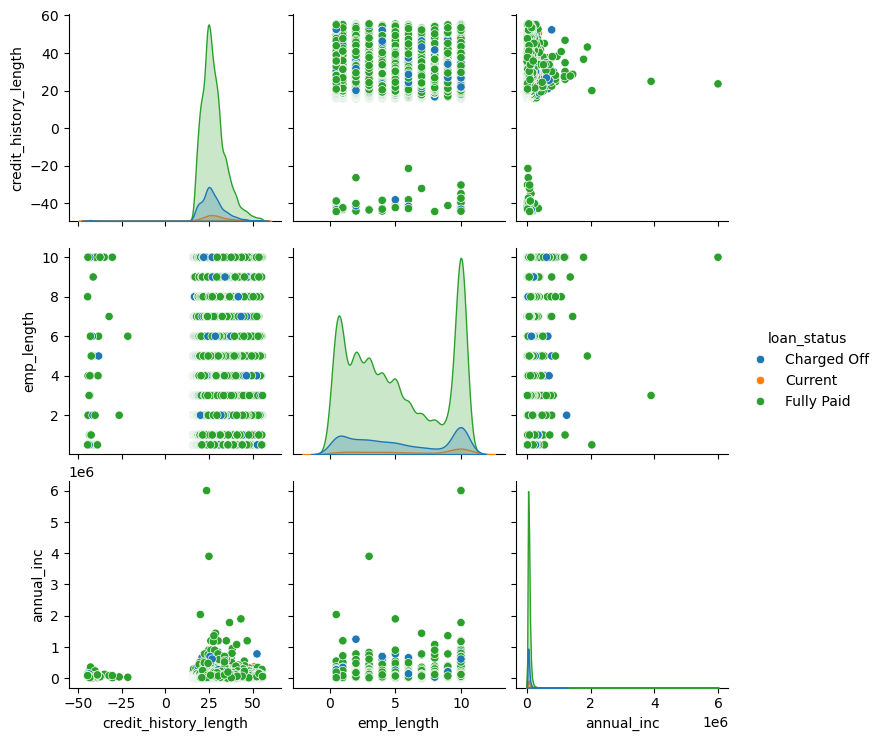

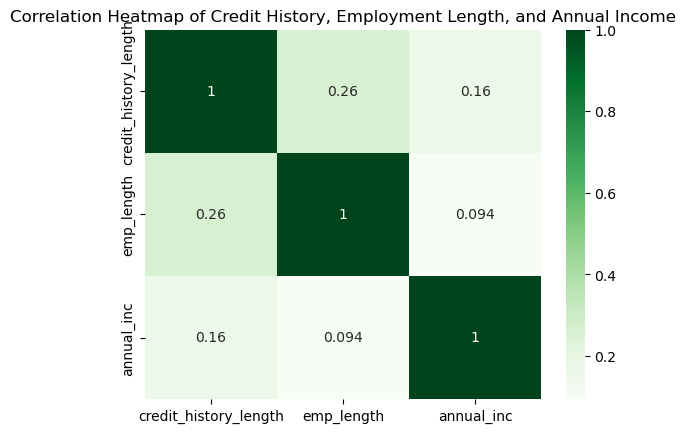

In [447]:
sns.pairplot(df, vars=['credit_history_length', 'emp_length', 'annual_inc'], hue='loan_status')
plt.show()

# Correlation heatmap
corr_matrix = df[['credit_history_length', 'emp_length', 'annual_inc']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Credit History, Employment Length, and Annual Income')
plt.show()


### Observations
- **Credit History Length**: The distribution is skewed, with most data points concentrated around lower values.
"Fully Paid" loans are more commonly associated with longer credit histories, whereas "Charged Off" loans appear more frequently at shorter lengths.

- **Employment Length**: Most borrowers have shorter employment lengths, but those with longer employment tend to have "Fully Paid" loans.

- **Annual Income**: Most borrowers, regardless of loan status, earn at the lower end of the income spectrum, as indicated by the peak in the density plot. Defaults occur across all income levels but are slightly more visible at lower income levels.

- There’s a weak positive correlation, suggesting a modest relationship where longer employment might coincide with a longer credit history, but it's not particularly strong.

- A very weak positive correlation indicates that higher incomes might slightly correlate with longer credit histories, but this relationship is not robust.

- A very weak correlation suggests almost no direct relationship between how long someone has been employed and their income level

##
## Grades, Sub Grades, and Loan Statuses

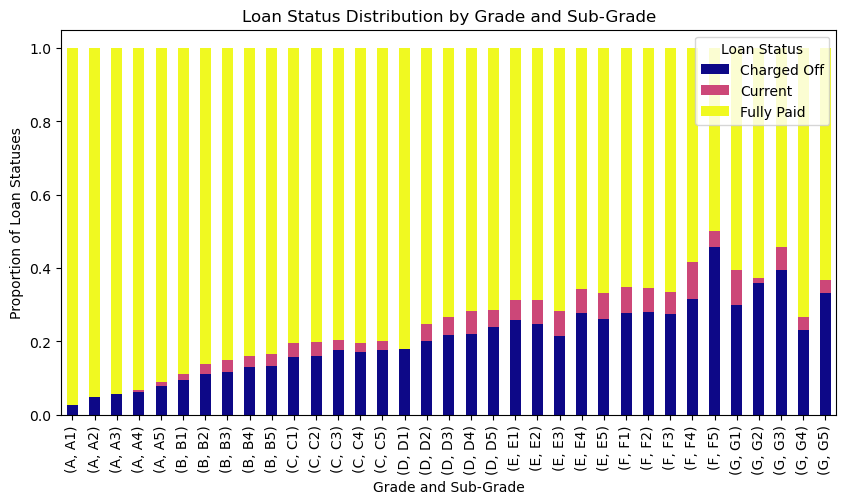

In [451]:
# Create a cross-tabulation of grades, sub-grades, and loan statuses
loan_status_summary = pd.crosstab([df['grade'], df['sub_grade']], df['loan_status'], margins=True, margins_name="Total")

# Normalize the data within each sub-grade for better comparison
loan_status_normalized = loan_status_summary.div(loan_status_summary["Total"], axis=0)

# Remove the 'Total' row and column for plotting
loan_status_normalized = loan_status_normalized.drop('Total', axis=1)
loan_status_normalized = loan_status_normalized.drop('Total', axis=0)

# Plot a stacked bar chart
ax = loan_status_normalized.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='plasma')
plt.title('Loan Status Distribution by Grade and Sub-Grade')
plt.xlabel('Grade and Sub-Grade')
plt.ylabel('Proportion of Loan Statuses')
plt.legend(title='Loan Status')
plt.xticks(rotation=90)
plt.show()

## Observations

- Higher Grades(A and B) Loans in these grades predominantly reach full payment status, with the highest numbers in grade A, peaking at sub-grade A4.
Lower Default Rates: Charge offs are present but significantly lower than fully paid loans, suggesting a lower risk of default.

- Middle Grades(C and D): There's a noticeable increase in charge offs as grades decline, indicating higher default risks.
Rising Charge Off Ratio: The ratio of charged off to fully paid loans increases, particularly evident as you move from grade C to D and beyond.

- The number of current loans tends to decrease in higher risk categories (lower grades).

- Within each grade, there is variation among sub-grades, suggesting varying risk levels even within a single grade.


##
## Loan Amount & Installment vs Loan Status

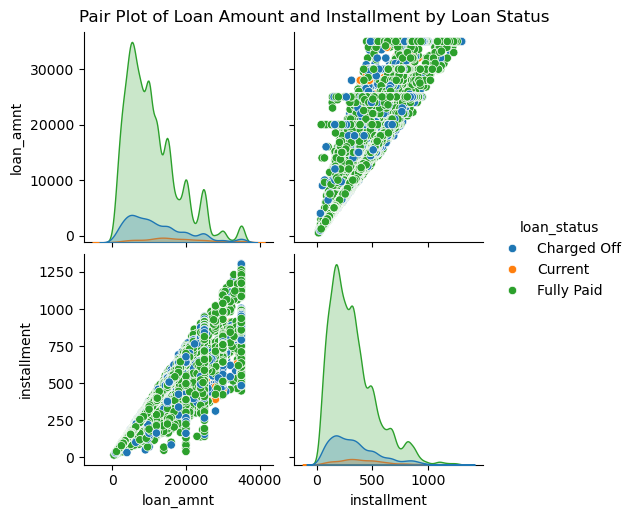

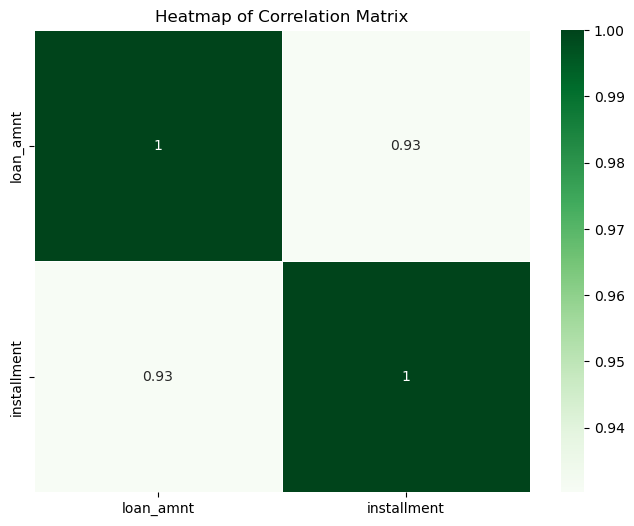

In [455]:
# Use seaborn to create a pair plot
sns.pairplot(df, hue='loan_status', vars=['loan_amnt', 'installment'])
plt.suptitle('Pair Plot of Loan Amount and Installment by Loan Status', y=1.02)
plt.show()

# Calculate the correlation matrix
corr_matrix = df[['loan_amnt', 'installment']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Observations
- Strong positive correlation (0.93) between loan amount and installment, indicating higher loans lead to larger installments, typical in loan structures.

- Fully Paid: Concentrated in lower to mid-range loan amounts and installments, suggesting smaller loans are more likely fully repaid.

- Charged Off: Less frequent but visible across all ranges, potentially clustering slightly more at higher loan amounts and installments.

- Right-skewed histograms for loan amount and installment, indicating more loans at lower values with fewer high-value loans.

- There is a tendency for Charged Off loans to appear more concentrated or clustered at the higher end of the loan amount and installment size ranges. This suggests that there might be a higher incidence of defaults or charged-off loans among borrowers who take larger loans or have higher monthly installment obligations. 

##
# Insights
1. Most borrowers prefer moderate-sized loans over very large or small ones.

2. Most loans have interest rates between 7.5% and 15%, with a peak around 10%.

3. Loans are mostly given to people with lower incomes; very few high-income individuals take out loans.

4. Borrowers generally have a moderate amount of debt compared to their income.

5. Loans are mainly given to people with good credit scores (grades A, B, and C).

6. Most loans are fully paid back, showing good repayment rates.

7. Borrowers with high credit scores (grades A and B) are less likely to default.

8. Lower debt-to-income ratios (0-20%) are linked to fewer defaults, while higher ratios (20-40%) show more defaults.

9. People with lower annual incomes default more often compared to those with higher incomes.

10. Borrowers in the West default more than those in other regions.

11. Longer-term loans (60 months) have higher default rates compared to shorter-term loans (36 months).

12. People with very long employment histories (10+ years) tend to default slightly more than those with shorter employment histories.

13. Small business loans have the highest default rates, while car, credit card, and wedding loans have lower default rates.

14. Higher debt-to-income ratios increase the likelihood of default.

15. Larger loans usually come with higher interest rates.

16. Fully paid loans are often associated with longer credit histories and lower debt-to-income ratios.

17. Higher-grade loans (A and B) are mostly fully paid, while lower grades (C, D, E, etc.) have higher default risks.

18. Larger loan amounts and higher installments are more likely to be defaulted on.


# Recommendations

1. Promote moderate-sized loans, as they are the most popular among borrowers.

2. Keep interest rates between 7.5% and 15%, especially around 10%, to attract more borrowers.

3. Create loan products for lower-income individuals and offer financial education programs to help them manage their finances and reduce default rates.

4. Encourage borrowers to keep their debt-to-income ratio moderate. Offer services to help them manage their debt better.

5. Focus on giving loans to people with good credit scores (grades A, B, and C).

6. Offer incentives for borrowers to make on-time payments, like reduced interest rates for consistent repayment.

7. Be stricter with loan approvals for borrowers with lower credit scores (grades C, D, E, etc.). Consider requiring collateral or a co-signer for these loans.

8. Set clear rules to monitor and manage debt-to-income ratios. Charge higher interest rates or set stricter terms for borrowers with high ratios.

9. Consider borrowers' income levels in risk assessments. Offer more support or stricter loan terms for lower-income borrowers to reduce default rates.

10. Develop region-specific loan products and risk models. For example, in the West, where default rates are higher, be stricter with approvals or charge higher interest rates.

11. Encourage shorter loan terms (36 months) to reduce default rates. Be stricter with evaluations or charge higher interest rates for longer-term loans (60 months).

12. Look into why borrowers with very long employment histories (10+ years) tend to default slightly more. Adjust loan terms or offer counseling to address any issues.

13. Review and possibly redesign loan products for small businesses, which have the highest default rates. Focus on promoting loans for cars, credit cards, and weddings, which have lower default rates.

14. Regularly check borrowers' debt-to-income ratios and provide support if their ratios increase significantly.

15. Be careful with larger loans. Assess the higher risks and offer interest rates that match the risk level.

16. Use the length of credit history as an important factor in loan approvals. Longer credit histories often mean better financial reliability.

17. Continue using loan grades to manage risk. Develop specific strategies for different grades to reduce default risks.

18. Carefully plan larger loan amounts and their installments. Require thorough credit checks or additional collateral to manage the higher default risk.
